In [21]:
import pandas as pd
import sklearn
from numpy import float16, mean, std
from sklearn import metrics
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import (
    KFold,
    RepeatedStratifiedKFold,
    cross_val_score,
    train_test_split,
)
import math
import seaborn as sns
import matplotlib.pyplot as plt

In [22]:
path = "../data/"

df = pd.read_csv(path + "VBM_data.csv")


def train_test(data: pd.DataFrame):
    
    """Return train-test subjects"""

    pd_patients = data[:14]
    sleep_patients = data[14:]

    print(f"number of sleep patients: {len(sleep_patients)}")
    print(f"number of PD patients: {len(pd_patients)}")

    number_of_train_pd = math.floor(0.6 * len(pd_patients))  # = 8
    number_of_train_sleep = math.floor(0.6 * len(sleep_patients))  # = 14
    train_pd = pd_patients[:number_of_train_pd]
    train_sleep = sleep_patients[:number_of_train_sleep]

    test_pd = pd_patients[number_of_train_pd:]
    test_sleep = sleep_patients[number_of_train_sleep:]

    assert len(train_pd) + len(test_pd) == len(pd_patients)
    assert len(train_sleep) + len(test_sleep) == len(sleep_patients)

    train = pd.concat([train_pd, train_sleep])
    test = pd.concat([test_pd, test_sleep])

    return train, test


In [23]:
train, test = train_test(df)

X_train = train.loc[:, df.columns.drop(["Subjectt", "Sex", "Chr", "PD"])]
X_test = test.loc[:, df.columns.drop(["Subjectt", "Sex", "Chr", "PD"])]

y_train = train.pop("PD")
y_test = test.pop("PD")

for column in X_train.columns:
    if X_train[column].dtype == "object":
        X_train[column] = X_train[column].apply(lambda x: str(x.replace(",", "")))
        X_train[column] = X_train[column].astype("float")

for column in X_test.columns:
    if X_test[column].dtype == "object":
        X_test[column] = X_test[column].apply(lambda x: str(x.replace(",", "")))
        X_test[column] = X_test[column].astype("float")

clf = RandomForestClassifier(n_estimators=500)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))

number of sleep patients: 24
number of PD patients: 14
Accuracy:  0.8125


In [24]:
ConfusionMatrix = metrics.confusion_matrix(y_test, y_pred)
print(ConfusionMatrix)

[[10  0]
 [ 3  3]]


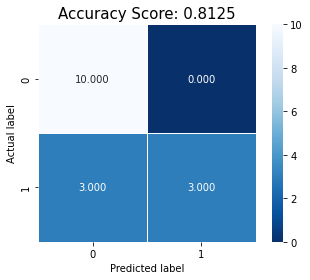

In [25]:
sns.heatmap(ConfusionMatrix, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(metrics.accuracy_score(y_test, y_pred))
plt.title(all_sample_title, size = 15);